**классификатор текстов LSTM + Embeddings**

Евгений Борисов <esborisov@sevsu.ru>

## Данные

In [29]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
tqdm.pandas()        
pd.options.display.max_colwidth = 200 

In [2]:
ff = ['id', 'tdate', 'tmane', 'ttext', 'ttype', 'trep', 'tfav', 'tstcount', 'tfol', 'tfrien', 'listcount','unk']

data = pd.concat([
    pd.read_csv('data/positive.csv.gz',sep=';',header=None),
    pd.read_csv('data/negative.csv.gz',sep=';',header=None),
])

data.columns = ff

data = data[['id','ttext', 'ttype']]

print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

data.sample(10)

negative: 111923 
positive: 114911


,id,ttext,ttype
103514,411112372883832832,@PolinkaBabarina @alina_mikii @leonardovaa @zhenechka250699 @SpaceFrolov @MLovkusha Приятности:D,1
6574,409086961849491456,"Я наверное старею, если ложусь рано спать в пятницу) Вообщем всем сладких, я выключаюсь",1
26223,409573573414899712,"@plotnikova_l @deniskorneevsky такой вот отвратительный театральный язык)) прогоны, репы, крайние спектакли и манты...",1
23356,409493737015103488,@vasily1000 я сейчас приду и помогу демонам убить тебя:D,1
98559,423012810474651648,@TomikMP не видела( потом повтор посмотрю,-1
89961,421623679974641664,"RT @Lina_malina96: @AlinaMironova4 @dudinskaya_17 что значит на 1 день? Вы хотите сказать, что сегодня вечером я не посижу вк? ((",-1
109142,424528531096223744,"так не люблю ,когда у Ксюхи какие-то проблемы со здоровьем (((( плак",-1
22092,409430702375968768,"наржались в скайпе :DDDDD утиииииии:3 я видео снимала даже, Лиза.ю хдддд",1
43198,409949595985510400,RT @Loved_Dagestan: Оригинальные окна в одном из домов #ПозитивныйДагестан. :-) #Дагестан #дагестан52 #Дагтви #Любимый_Дагестан http://t…,1
99516,423069448250327040,"Хочу посмотреть фильм, который снят по книге, которую я сейчас читаю.\nНу рука не поднимается ((((((",-1


### очистка данных

In [3]:
import re

In [4]:
# применяет список замен pat к строке s
def replace_patterns(s,pat):
    if len(pat)<1: return s
    return  replace_patterns( re.sub(pat[0][0],pat[0][1],s), pat[1:] )

# нормализация текста
def string_normalizer(s):
    pat = [
      [r'[ёЁ]','е'] # замена ё для унификации
      #,[r'</?[a-z]+>',' '] # удаляем xml
      ,[r'[:;]-*[)D]',' радость ']
      ,[r'\)\)\)*',' радость ']
      ,[r'[:;]\*',' поцелуй ']
      ,[r':\(',' печаль ']
      ,[r'\(\(\(*',' печаль ']
      #,[r'\d+',' digit ']
    ]
    return replace_patterns(s,pat).strip()

In [17]:
data['ttext_'] = data['ttext'].progress_apply(string_normalizer)

  0%|          | 0/226827 [00:00<?, ?it/s]

In [18]:
import re
from nltk.tokenize import word_tokenize as nltk_tokenize_word

In [19]:
def tokenize(line): # разбиваем предложения на слова
    return    [ 
        t.lower() 
        for t in nltk_tokenize_word(line) 
        if re.match(r'[a-zа-я]+',t.lower()) # выкинуть слова не содержащие букв
        # if re.match(r'[а-я -]+',t.lower()) and len(t)>1 
        # if not( (t.lower() in stopwords) or (len(t)<3) ) 
    ] 

In [20]:
data['ttext_'] = data['ttext_'].progress_apply(tokenize)

  0%|          | 0/226827 [00:00<?, ?it/s]

In [21]:
data.sample(10)

,id,ttext,ttype,ttext_
176127,416652655155363840,"бессонная ночь работы с фотошопом, зато деньги на подарки теперь есть\nстипендию-то не выдали, гады(",-1,"[бессонная, ночь, работы, с, фотошопом, зато, деньги, на, подарки, теперь, есть, стипендию-то, не, выдали, гады]"
160319,414619647015530497,Не брился и даже не умывался......пох......так и весь день пройдет((((,-1,"[не, брился, и, даже, не, умывался, пох, так, и, весь, день, пройдет, печаль]"
35102,409772459538137088,"ну что же,ваш толстый пирожок идет спать.всем сладких)",1,"[ну, что, же, ваш, толстый, пирожок, идет, спать.всем, сладких]"
131958,411198467046789121,"аааа...как же тяжело постоянно скучать по кому-то!а через полгода в список тех,по кому я скучаю, добавится еще человек 6!!!:(",-1,"[аааа, как, же, тяжело, постоянно, скучать, по, кому-то, а, через, полгода, в, список, тех, по, кому, я, скучаю, добавится, еще, человек, печаль]"
82865,410770338092310529,чуть-чуть побаловалась) хочется на лыжиии http://t.co/QSqOGjKgwD,1,"[чуть-чуть, побаловалась, хочется, на, лыжиии, http]"
164192,415082527695851520,"виииилсан, привет. я твой твиткам пропустила, потому что интернета нормального не было :-(",-1,"[виииилсан, привет, я, твой, твиткам, пропустила, потому, что, интернета, нормального, не, было]"
147055,412986188115746817,"@Len_o_k хорошо , что я около дома была и открыла дверь только вот Герда домой не хотела заходить , а на нас собаки лают , короче весело (",-1,"[len_o_k, хорошо, что, я, около, дома, была, и, открыла, дверь, только, вот, герда, домой, не, хотела, заходить, а, на, нас, собаки, лают, короче, весело]"
214671,423084392777809920,"RT @yaninochka2013: новая группа, просто ужас(",-1,"[rt, yaninochka2013, новая, группа, просто, ужас]"
195345,419558729676103680,"Ты, наверное, сидишь сейчас где-то забившись в уголке и мерзнешь.\n\nИ все из-за меня :(",-1,"[ты, наверное, сидишь, сейчас, где-то, забившись, в, уголке, и, мерзнешь, и, все, из-за, меня, печаль]"
132370,411219295343878144,Еду с любимым...на московском пробка стоим(,-1,"[еду, с, любимым, на, московском, пробка, стоим]"


In [22]:
# data[ data['ttext_'].str.len()<1 ]
max_len = data['ttext_'].str.len().max() # максимальная длинна последовательности
max_len

36

In [23]:
data[ data['ttext_'].str.len()<1 ] # пустые последовательности

,id,ttext,ttype,ttext_


In [24]:
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111918 
positive: 114909


In [25]:
data = data[ data['ttext_'].str.len()>0 ].reset_index(drop=True)
print( 'negative:', len(data.query('ttype==-1')), '\npositive:',len(data.query('ttype==1')) )

negative: 111918 
positive: 114909


### кодируем слова

In [26]:
words = set([ w for s in data['ttext_'].apply(set) for w in s ])
vocab = { w:n for n,w in enumerate(sorted(words)) }
print(len(vocab))

272410


In [109]:
# vocab

In [75]:
X  = data['ttext_'].progress_apply(lambda s: [vocab[w] for w in s])
target = (data['ttype']+1)//2
y = np.eye(max(target)+1,dtype=np.float32)[target] # строим выход нейросети (из 2 нейронов)

  0%|          | 0/226827 [00:00<?, ?it/s]

In [76]:
# дополняем последовательности нулями до единого формата,
# выкидываем те, что не нашли соответствия в словаре W2V
y = np.array([ y[i] for i,xi in enumerate(X) if len(xi)>0 ])
X = np.array([ [0]*(max_len-len(xi)) + xi for xi in X if len(xi)>0  ],dtype=np.int32)
X.shape, y.shape

((226827, 36), (226827, 2))

In [77]:
from sklearn.model_selection import train_test_split

# делим данные для оценки
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=.4 )
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((136096, 36), (136096, 2), (90731, 36), (90731, 2))

In [78]:
del X
del y
del target

## модель

In [79]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [80]:
torch.__version__

'1.10.2+cu102'

In [96]:
num_embeddings=len(vocab)
embedding_dim = 128
hidden_dim = 128
n_classes = 2

class Model(nn.Module):
    def __init__(self, 
                 num_embeddings=num_embeddings,
                 embedding_dim=embedding_dim,
                 hid_dim=hidden_dim,   # размер рекуррентного слоя
                 output_dim=n_classes, # размер выхода
                ):
        super().__init__()
        self._emb = nn.Embedding(num_embeddings, embedding_dim) 
        self._rnn = nn.LSTM( embedding_dim, hid_dim, batch_first=True) # рекуррентный слой
        self._linear = nn.Linear(hid_dim, output_dim) # выходной (линейный) слой

    def forward(self,x):
        o = self._emb(x) # обрабатываем входную последовательность
        _, (hidden, _) = self._rnn(o) # обрабатываем входную последовательность
        o = hidden.squeeze(0) # прекомпоновка тензора, сокращаем размерность
        o = self._linear(o) # считаем выход сети
        o = F.softmax(o,dim=1)
        return o 

In [97]:
model = Model()
model

Model(
  (_emb): Embedding(272410, 128)
  (_rnn): LSTM(128, 128, batch_first=True)
  (_linear): Linear(in_features=128, out_features=2, bias=True)
)

In [99]:
# o =  model.forward( torch.tensor(x_train[:256],dtype=torch.int32) ) # .to(device) )
# o.shape

### обучаем модель

In [100]:
# проверяем GPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [101]:
model = model.to(device)

In [102]:
criterion =  nn.CrossEntropyLoss() # ф-ция потери
optimizer = torch.optim.Adam(model.parameters(), lr=.005) # метод оптимизации

In [103]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader # генератор батчей

# пакуем данные в формат Torch
dataset_train = TensorDataset(torch.tensor(x_train,dtype=torch.int32), torch.tensor(y_train,dtype=torch.float32) )

In [104]:
from sklearn.metrics import accuracy_score

def accuracy(dataset):
    with torch.set_grad_enabled(False):
        return np.mean([
            accuracy_score(
                y[:,1],
                np.argmax( model(x.to(device)).cpu().numpy(),axis=1 )
            )
            for x,y in DataLoader(dataset, batch_size=len(dataset)//100, shuffle=False)
        ])
        
acc_history = [ accuracy(dataset_train) ] # начальное значение погрешности

In [105]:
%%time

from torch.utils.data import DataLoader # генератор батчей

loss_history = [ ] # значения ф-ции потери
n_epoch = 7 # количество эпох обучения

for i in tqdm(range(n_epoch)): 
    
    # получаем батч учебных примеров
    for x,y in DataLoader(dataset_train, batch_size=len(y_train)//100, shuffle=True): 
        out = model.forward(x.to(device)) # считаем выход модели
        loss = criterion( y.to(device),out ) # вычисляем значение ф-ции потери
        loss_history.append(loss.item()) # дополняем историю изменения значений ф-ции потери
        optimizer.zero_grad() # очищаем предыдущее значение градиента
        loss.backward()  # вычисляем текущее значение градиента ф-ции потери
        optimizer.step() # корректируем параметры модели
        
    acc_history.append( accuracy(dataset_train) ) #значение погрешности

  0%|          | 0/7 [00:00<?, ?it/s]

CPU times: user 41.6 s, sys: 28.7 ms, total: 41.6 s
Wall time: 41.7 s


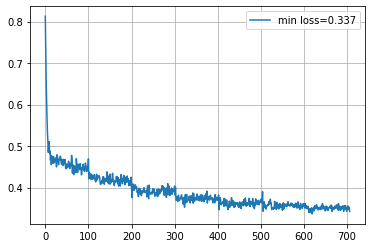

In [106]:
from matplotlib import pyplot as plt
# история изменения значений ф-ции потери
plt.plot(loss_history,label='min loss=%.3f'%(min(loss_history)))
plt.grid()
plt.legend()

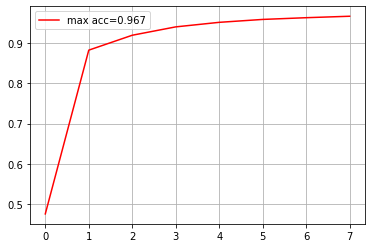

In [107]:
# история изменения значений погрешности модели
plt.plot(acc_history,label='max acc=%.3f'%(max(acc_history)),c='r')
plt.grid()
plt.legend()

## проверяем результат

In [108]:
dataset_test = TensorDataset(torch.tensor(x_test,dtype=torch.int32), torch.tensor(y_test,dtype=torch.float32) )
with torch.set_grad_enabled(False):
    o_test = np.hstack([
            np.argmax( model(x.to(device)).cpu().numpy(),axis=1 )
            for x,_ in DataLoader(dataset_test, batch_size=len(dataset_test)//100, shuffle=False)
        ])
    
from sklearn.metrics import classification_report
print(classification_report( np.argmax(y_test,axis=1),o_test))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     44857
           1       0.90      0.89      0.90     45874

    accuracy                           0.90     90731
   macro avg       0.90      0.90      0.90     90731
weighted avg       0.90      0.90      0.90     90731

